In [1]:
pip install pymc3

  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529976 sha256=2066f397ba3c61bad02d07671b1888f31a1dab4dfb06c21e20510c587457ba6a
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\04\22\4d\832878ba2fe9ea3543f0189b9288a78e4aa4e0afc851a6890c
Successfully built theano-pymc
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: xarray
    Found existing installation: xarray 0.20.1
    Uninstalling xarray-0.20.1:
      Successfully uninstalled xarray-0.20.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.1 which is incompatible.


WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\Lenovo\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Lenovo\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in lo

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 96 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Lenovo\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'beta\n0'}>,
       <AxesSubplot:title={'center':'beta\n1'}>,
       <AxesSubplot:title={'center':'intercept'}>], dtype=object)

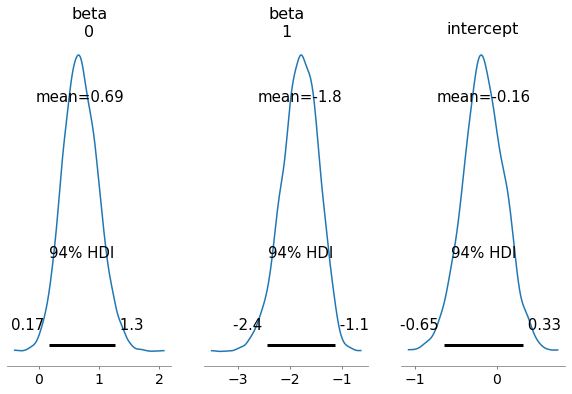

In [1]:
import numpy as np
import pymc3 as pm

# Generate synthetic dataset
np.random.seed(42)
X = np.random.normal(0, 1, (100, 2))
true_beta = np.array([1, -2])
true_intercept = 0
logit_probs = true_intercept + np.dot(X, true_beta)
y = np.random.binomial(1, p=1 / (1 + np.exp(-logit_probs)))

# Define the Bayesian logistic regression model using PyMC3
with pm.Model() as logistic_model:
    # Priors
    beta = pm.Normal('beta', mu=0, sigma=1, shape=X.shape[1])
    intercept = pm.Normal('intercept', mu=0, sigma=1)

    # Likelihood
    p = pm.math.sigmoid(intercept + pm.math.dot(X, beta))
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

    # Sample from the posterior distribution
    trace = pm.sample(1000, tune=1000)

# Plot posterior distributions of coefficients
pm.plot_posterior(trace, var_names=['beta', 'intercept'], figsize=(10, 6))
